## Sentiment Analysis of Russia-Ukraine War using Twitter Data

In [1]:
# Loading libraries and dependencies
from textblob import TextBlob
import numpy as np
import pandas as pd
import csv
import re
import sys
import os
import nltk

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
sns.set(rc={'figure.figsize': (20,10)})

In [3]:
# Loading dataset and exploring data structure
filename = r"C:/Users/candy/Documents/PORTFOLIO_PROJECTS/SentimentAnalysis/0401_UkraineCombinedTweetsDeduped.csv.gzip"
twitter_df = pd.read_csv(filename, compression='gzip', index_col=0,encoding='utf-8', quoting=csv.QUOTE_ALL)

In [4]:
twitter_df.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04.000000,1509681950042198030,2022-04-01 00:00:00.000000,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34.000000,1509681950151348229,2022-04-01 00:00:00.000000,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01.000000,1509681950683926556,2022-04-01 00:00:00.000000,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44.000000,1509681951116046336,2022-04-01 00:00:00.000000,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40.000000,1509681951304990720,2022-04-01 00:00:00.000000,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


In [5]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364875 entries, 0 to 364874
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   userid          364875 non-null  int64 
 1   username        364875 non-null  object
 2   acctdesc        286432 non-null  object
 3   location        212933 non-null  object
 4   following       364875 non-null  int64 
 5   followers       364875 non-null  int64 
 6   totaltweets     364875 non-null  int64 
 7   usercreatedts   364875 non-null  object
 8   tweetid         364875 non-null  int64 
 9   tweetcreatedts  364875 non-null  object
 10  retweetcount    364875 non-null  int64 
 11  text            364875 non-null  object
 12  hashtags        364875 non-null  object
 13  language        364875 non-null  object
 14  coordinates     97 non-null      object
 15  favorite_count  364875 non-null  int64 
 16  extractedts     364875 non-null  object
dtypes: int64(7), object(10)
memor

In [6]:
# Updating time/date column to datetime dtype
twitter_df["usercreatedts"] = pd.to_datetime(twitter_df["usercreatedts"])
twitter_df["tweetcreatedts"] = pd.to_datetime(twitter_df["tweetcreatedts"])
twitter_df["extractedts"] = pd.to_datetime(twitter_df["extractedts"])

In [7]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364875 entries, 0 to 364874
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   userid          364875 non-null  int64         
 1   username        364875 non-null  object        
 2   acctdesc        286432 non-null  object        
 3   location        212933 non-null  object        
 4   following       364875 non-null  int64         
 5   followers       364875 non-null  int64         
 6   totaltweets     364875 non-null  int64         
 7   usercreatedts   364875 non-null  datetime64[ns]
 8   tweetid         364875 non-null  int64         
 9   tweetcreatedts  364875 non-null  datetime64[ns]
 10  retweetcount    364875 non-null  int64         
 11  text            364875 non-null  object        
 12  hashtags        364875 non-null  object        
 13  language        364875 non-null  object        
 14  coordinates     97 non-null      obj

In [8]:
# Exploring the languages used in the tweets
all_languages = twitter_df["language"].unique()
all_languages

array(['en', 'ar', 'es', 'tr', 'fr', 'no', 'uk', 'hi', 'de', 'und', 'it',
       'zh', 'in', 'pt', 'ja', 'nl', 'th', 'cs', 'bn', 'ur', 'pl', 'sv',
       'eu', 'ru', 'sl', 'et', 'el', 'ro', 'ht', 'fa', 'da', 'or', 'lt',
       'iw', 'gu', 'tl', 'bg', 'fi', 'lv', 'ko', 'ca', 'cy', 'ta', 'te',
       'hu', 'mr', 'sr', 'am', 'ne', 'ml', 'vi', 'is', 'kn', 'ka', 'pa',
       'my', 'ckb', 'hy', 'si', 'ps', 'dv'], dtype=object)

In [9]:
tweet_languages = twitter_df.language.value_counts()
tweet_languages.head()

en     254626
fr      18647
de      16446
it      15877
und     15613
Name: language, dtype: int64

## EDA 

### Top languages used to tweet

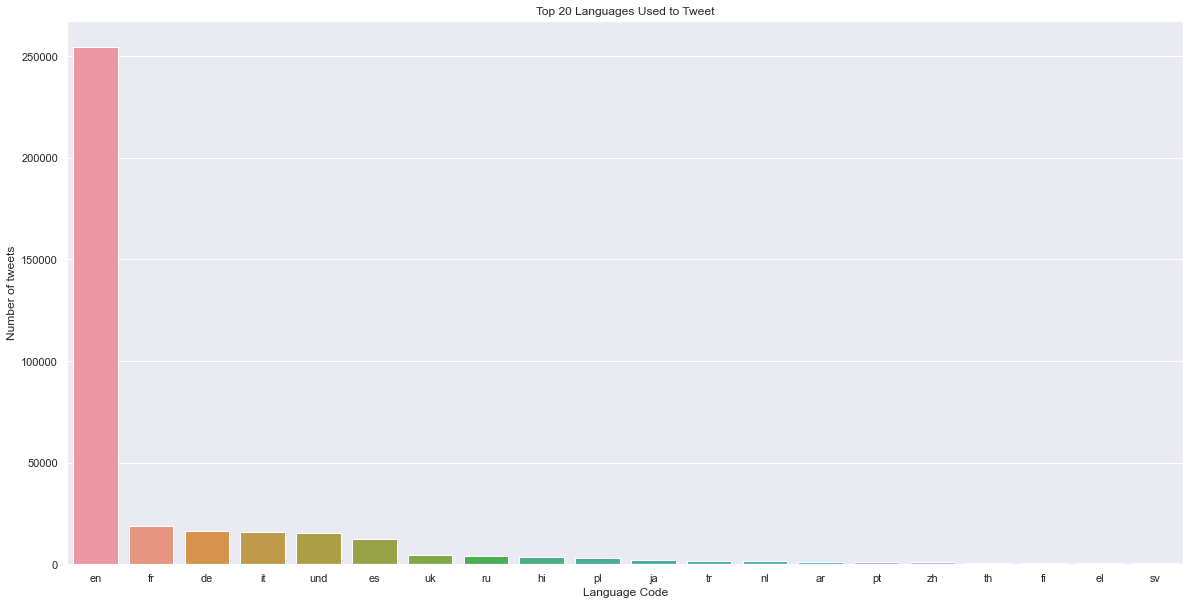

In [10]:
# Visualizing the languages used to tweet
ax = sns.barplot(x= tweet_languages[:20].index,y=tweet_languages[:20])

ax.set(xlabel='Language Code', ylabel='Number of tweets', title='Top 20 Languages Used to Tweet')
plt.show()


In [11]:
# Checking for any duplicate tweet ids
twitter_df.loc[twitter_df.duplicated(["tweetid"],keep=False)].sort_values("tweetid").head(6)

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts


In [12]:
# Keep tweets only in English
twitter_en = twitter_df.loc[twitter_df["language"]=="en"]
twitter_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34,1509681950151348229,2022-04-01,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01,1509681950683926556,2022-04-01,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459


### Most tweets based on location

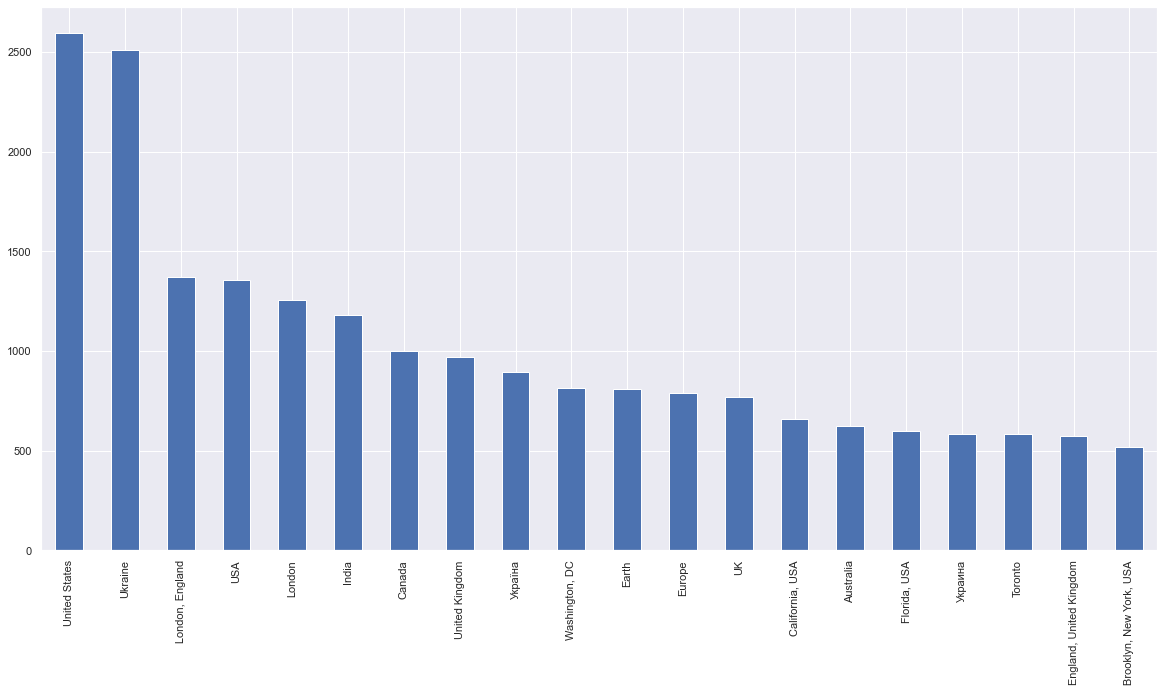

In [13]:
# Most tweets based on location
twitter_en.location.value_counts()[:20].plot.bar()

plt.show()

In [14]:
# Standardizing text and removing special characters
twitter_en["cleaned_text"] = twitter_en["text"].str.lower()

def remove_rt(x): return re.sub('RT @\w+: ', " ", x)
 
def rt(x): return re.sub(
    "(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", x)
 
twitter_en["cleaned_text"] = twitter_en.cleaned_text.map(remove_rt).map(rt)

twitter_en["cleaned_text"].head(10)
twitter_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,cleaned_text
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867,the ukrainian air force would like to address...
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34,1509681950151348229,2022-04-01,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770,chernihiv oblast ukrainians welcome their lib...
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01,1509681950683926556,2022-04-01,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654,america is preparing for something worse th...
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382,just in anonymous has hacked amp released ...
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459,public mint now live for wmn win 1...


### Sentiment Analysis

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [16]:
twitter_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,cleaned_text
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01,3412,⚡The Ukrainian Air Force would like to address...,[],en,NaN,0,2022-04-01 00:44:20.097867,the ukrainian air force would like to address...
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34,1509681950151348229,2022-04-01,100,Chernihiv oblast. Ukrainians welcome their lib...,"[{'text': 'russianinvasion', 'indices': [77, 9...",en,NaN,0,2022-04-01 00:09:37.148770,chernihiv oblast ukrainians welcome their lib...
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01,1509681950683926556,2022-04-01,9,America 🇺🇸 is preparing for something worse th...,"[{'text': 'RussianUkrainianWar', 'indices': [7...",en,NaN,0,2022-04-01 00:09:37.125654,america is preparing for something worse th...
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01,573,JUST IN: #Anonymous has hacked &amp; released ...,"[{'text': 'Anonymous', 'indices': [25, 35]}]",en,NaN,0,2022-04-01 00:31:39.674382,just in anonymous has hacked amp released ...
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01,190,***PUBLIC MINT NOW LIVE***\n\nFor \n@billionai...,[],en,NaN,0,2022-04-01 00:09:37.101459,public mint now live for wmn win 1...


### Wordcloud of Tweets Showing Most Frequently Used Words 

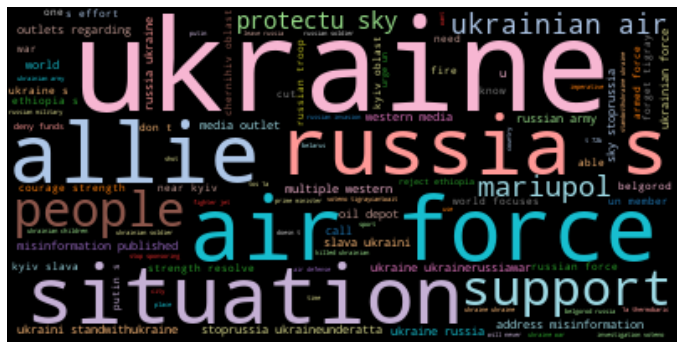

In [29]:
text = " ".join(i for i in twitter_en.cleaned_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='tab20').generate(text)
plt.figure( figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Scores

In [18]:
# Classifying tweets into positive, negative and neutral
analyzer = SentimentIntensityAnalyzer()
twitter_en["Positive"] = [analyzer.polarity_scores(i)["pos"] for i in twitter_en['cleaned_text']]
twitter_en["Negative"] = [analyzer.polarity_scores(i)["neg"] for i in twitter_en['cleaned_text']]
twitter_en["Neutral"] = [analyzer.polarity_scores(i)["neu"] for i in twitter_en['cleaned_text']]
twitter_en["Compound"] = [analyzer.polarity_scores(i)["compound"] for i in twitter_en['cleaned_text']]

sentiment = twitter_en[["cleaned_text", "Positive", "Negative", "Neutral", "Compound"]]
sentiment.head()

,cleaned_text,Positive,Negative,Neutral,Compound
0,the ukrainian air force would like to address...,0.139,0.061,0.800,0.4404
1,chernihiv oblast ukrainians welcome their lib...,0.176,0.000,0.824,0.4588
2,america is preparing for something worse th...,0.097,0.162,0.741,-0.4215
3,just in anonymous has hacked amp released ...,0.000,0.065,0.935,-0.4019
4,public mint now live for wmn win 1...,0.316,0.000,0.684,0.8658


In [19]:
# Classifying into pos, neu, neg
conditions = [
    (twitter_en['Compound'] <= -0.5),
    (twitter_en['Compound'] >= 0.5),
    (twitter_en['Compound'] > -0.5) & (twitter_en['Compound'] < 0.5)
    ]

classification = ['Negative', 'Positive', 'Neutral']

twitter_en['Category'] = np.select(conditions, classification)
twitter_en.head()

,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,...,language,coordinates,favorite_count,extractedts,cleaned_text,Positive,Negative,Neutral,Compound,Category
0,16882774,Yaniela,"Animal lover, supports those who fight injusti...",Hawaii,1158,392,88366,2008-10-21 07:34:04,1509681950042198030,2022-04-01,...,en,NaN,0,2022-04-01 00:44:20.097867,the ukrainian air force would like to address...,0.139,0.061,0.800,0.4404,Neutral
1,3205296069,gregffff,NaN,NaN,122,881,99853,2015-04-25 11:24:34,1509681950151348229,2022-04-01,...,en,NaN,0,2022-04-01 00:09:37.148770,chernihiv oblast ukrainians welcome their lib...,0.176,0.000,0.824,0.4588,Neutral
2,1235940869812809728,ThanapornThon17,เล่นไวโอลิน\nพูดภาษาจีน,NaN,231,72,5481,2020-03-06 14:52:01,1509681950683926556,2022-04-01,...,en,NaN,0,2022-04-01 00:09:37.125654,america is preparing for something worse th...,0.097,0.162,0.741,-0.4215,Neutral
3,1347985375566966784,I_Protest_2021,01000001 01101110 01101111 01101110 01111001 0...,International Web Zone,399,377,301,2021-01-09 19:15:44,1509681951116046336,2022-04-01,...,en,NaN,0,2022-04-01 00:31:39.674382,just in anonymous has hacked amp released ...,0.000,0.065,0.935,-0.4019,Neutral
4,1505394816636846083,Marsh_Win_01,🌿@Pickaw @TWITTERPICKER 🌿Winning isn’t everyth...,Hunter Account,158,25,8982,2022-03-20 04:04:40,1509681951304990720,2022-04-01,...,en,NaN,0,2022-04-01 00:09:37.101459,public mint now live for wmn win 1...,0.316,0.000,0.684,0.8658,Positive


In [20]:
# Grouping the sentiment classifications
pd.DataFrame(twitter_en.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Total_tweets"}).assign(
    Percentage=lambda x: (x.Total_tweets/ x.Total_tweets.sum())*100)

,Total_tweets,Percentage
Category,,
Negative,71092,27.920165
Neutral,138108,54.239551
Positive,45426,17.840283


### Sentiment Visualization

In [21]:
tweet_pos = len(twitter_en.loc[twitter_en['Category'] == "Positive"])
tweet_neg = len(twitter_en.loc[twitter_en['Category'] == "Negative"])
tweet_neu = len(twitter_en.loc[twitter_en['Category'] == "Neutral"])
total_tweets = len(twitter_en)

print(f"Percent of positive tweets: {round((tweet_pos/total_tweets)*100, 2)}%")
print(f"Percent of negative tweets: {round((tweet_neg/total_tweets)*100, 2)}%")
print(f"Percent of neutral tweets: {round((tweet_neu/total_tweets)*100, 2)}%")

Percent of positive tweets: 17.84%
Percent of negative tweets: 27.92%
Percent of neutral tweets: 54.24%


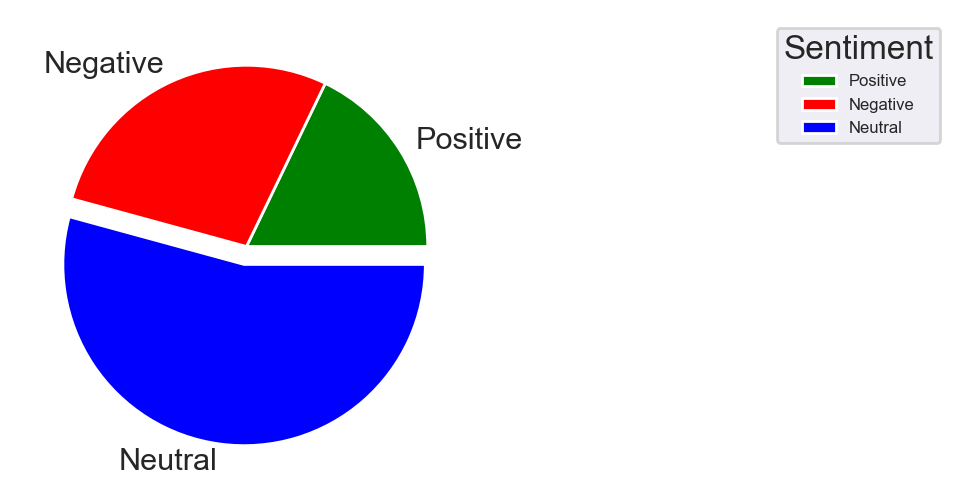

In [23]:
# Visualizing the sentiments
my_labels = ["Positive", "Negative", "Neutral"]
my_colors = ["Green", "Red", "Blue"]
 
plt.figure(figsize=(6,3),
           dpi=200)
myexplode = [0, 0, 0.1]
plt.pie([tweet_pos, tweet_neg, tweet_neu], colors=my_colors,
        labels=my_labels, explode = myexplode)
plt.legend(my_labels, bbox_to_anchor=(2.05, 1), loc='upper right', title="Sentiment", prop={'size': 6})
plt.show()

#### Wordcloud for Negative Sentiments

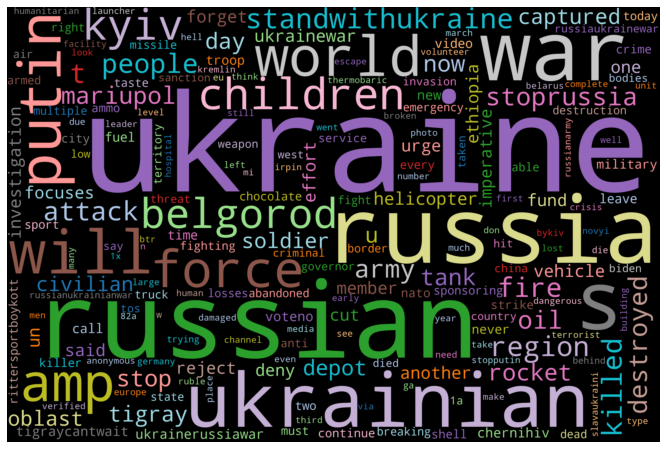

In [26]:
# Negative sentiments
text = " ".join(review for review in twitter_en[twitter_en['Category'] =='Negative'].cleaned_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, background_color="black",colormap='tab20', collocations=False).generate(text)

plt.figure( figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### Wordcloud for Positive Sentiments

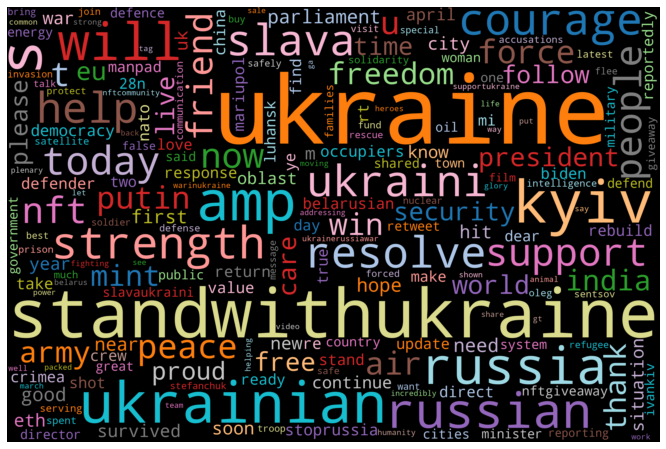

In [27]:
# Positive sentiments
text = " ".join(review for review in twitter_en[twitter_en['Category'] =='Positive'].cleaned_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, background_color="black",colormap='tab20', collocations=False).generate(text)

plt.figure( figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



#### Wordcloud for Neutral Sentiments

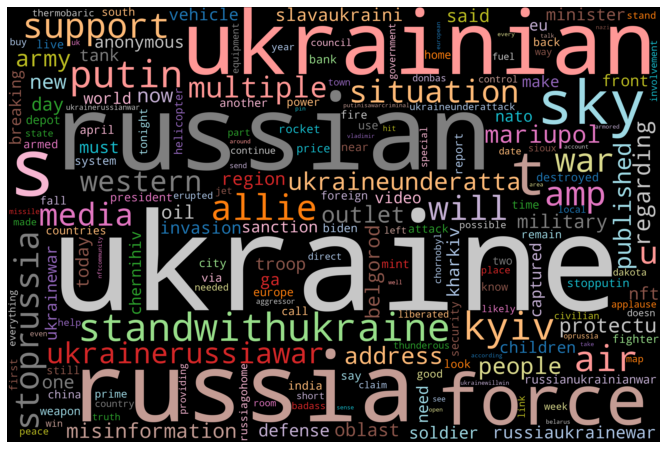

In [28]:
# Neutral sentiments
text = " ".join(review for review in twitter_en[twitter_en['Category'] =='Neutral'].cleaned_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 3000, height = 2000, background_color="black",colormap='tab20', collocations=False).generate(text)

plt.figure( figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
